In [2]:
# imports and data reading
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import geopandas as gp

#read data
df = pd.read_csv(Path.cwd().parents[0] / "CSV" / "Raw"/ "all_tweets.csv")
df.head()


/home/sagnik/miniconda3/envs/workshop_env/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


,long,lat,post_guid,post_body,post_publish_date,post_language,hashtags,emoji
0,9.159337,45.461345,821687743382167552,L’esercito silenzioso delle #donne #migranti h...,2017-01-18 11:56:38,it,"{migranti,donne}",{}
1,12.545146,41.898417,821691034749009921,".@lauraravetto: #Migranti, “Che dice Minniti s...",2017-01-18 12:09:43,it,{Migranti},{}
2,-8.621914,41.162142,821690229597868032,#refugeecrisis https://t.co/JQoSFvMTbl,2017-01-18 12:06:31,und,{refugeecrisis},{}
3,12.545146,41.898417,821690521940881409,".@lauraravetto : #Migranti, “Che dice Minniti ...",2017-01-18 12:07:41,it,{Migranti},{}
4,-2.115866,53.073712,821693014267559936,""".@theresa_may: '""We can still have EU workers...",2017-01-18 12:17:35,en,"{Brexit,PMQs,immigration}",{}


In [3]:
#clean data

def clean_emoji(x):
    if x == '{}':
        return ''
    else:
        return x[1:-1]

df['emoji'] = df['emoji'].apply(clean_emoji)
df['hashtags'] = df['hashtags'].apply(lambda x:x[1:-1])
df.head()  

,long,lat,post_guid,post_body,post_publish_date,post_language,hashtags,emoji
0,9.159337,45.461345,821687743382167552,L’esercito silenzioso delle #donne #migranti h...,2017-01-18 11:56:38,it,"migranti,donne",
1,12.545146,41.898417,821691034749009921,".@lauraravetto: #Migranti, “Che dice Minniti s...",2017-01-18 12:09:43,it,Migranti,
2,-8.621914,41.162142,821690229597868032,#refugeecrisis https://t.co/JQoSFvMTbl,2017-01-18 12:06:31,und,refugeecrisis,
3,12.545146,41.898417,821690521940881409,".@lauraravetto : #Migranti, “Che dice Minniti ...",2017-01-18 12:07:41,it,Migranti,
4,-2.115866,53.073712,821693014267559936,""".@theresa_may: '""We can still have EU workers...",2017-01-18 12:17:35,en,"Brexit,PMQs,immigration",


In [4]:
#change timestamps to datetime format

df['post_publish_date'] = pd.to_datetime(df['post_publish_date'])
df['post_publish_date']

0        2017-01-18 11:56:38
1        2017-01-18 12:09:43
2        2017-01-18 12:06:31
3        2017-01-18 12:07:41
4        2017-01-18 12:17:35
                 ...        
168248   2017-01-18 11:05:00
168249   2017-01-18 11:22:18
168250   2017-01-18 11:17:53
168251   2017-01-18 11:30:09
168252   2017-01-18 11:47:23
Name: post_publish_date, Length: 168253, dtype: datetime64[ns]

In [5]:
#count the most common hashtags

results = Counter()
df['hashtags'].str.lower().str.split(',').apply(results.update)
print(results.most_common(30))

[('refugees', 16456), ('migranti', 14233), ('migrants', 12282), ('refugeeswelcome', 11789), ('muslimban', 10789), ('migration', 8852), ('immigration', 7454), ('refugee', 4562), ('refugiados', 3756), ('immigrazione', 3082), ('flüchtlinge', 3050), ('worldrefugeeday', 3018), ('withrefugees', 2845), ('eu', 2721), ('refugeecrisis', 2656), ('trump', 2349), ('asylum', 2179), ('migranten', 2149), ('hostileenvironment', 2046), ('brexit', 2045), ('immigrati', 2040), ('trndnl', 2015), ('migrant', 1901), ('immigrants', 1793), ('réfugiés', 1731), ('refugeesgr', 1707), ('vluchtelingen', 1672), ('greece', 1526), ('lesbos', 1512), ('rapefugees', 1499)]


In [60]:
len(results)

68216

In [6]:
df['hashtags'][df['post_language']=='es']

6                                                Refugiados
23                      RefugeeCamp,ongietorrierrefuxiatuak
46                           Refugee,Madrid,RefugeesWelcome
49                          Lesbos,Lesvos,Refugiados,Greece
64        humanrights,refugees,refugiados,derechoshumano...
                                ...                        
168191                                deportistasambulantes
168209                                    Refugiados,Europa
168226                                 TTIP,CETA,refugiados
168239                                 deportistas,política
168245                                   PlenoPE,Refugiados
Name: hashtags, Length: 9956, dtype: object

In [7]:
#finding co-occuring hashtags with "migranti"

hashtags = df['hashtags'][df['post_language']=='es'].tolist()
pattern = re.compile(r'(.*),(Refugiados)',re.IGNORECASE)
newlist = list(filter(pattern.match, hashtags))  
print(newlist[:10]) 

['Lesbos,Lesvos,Refugiados,Greece', 'humanrights,refugees,refugiados,derechoshumanos,forges', 'humanrights,refugees,europa,refugiados,derechoshumanos', 'humanrights,refugees,vergüenza,refugiados,derechoshumanos', 'CristianosPerseguidos,SemanaDeOración,UnidadDeLosCristianos,refugiados', 'RefugeesWelcome,Humanrights,Refugiados', 'ejemplo,Humanrights,Refugiados', 'CruzRoja,Nigeria,refugiados,Protegerlahumanidad,Ejea', 'Perama,Grecia,nazis,refugiados', 'friosiberiano,friofrio,Refugiados,UnionEuropea']


In [8]:
#making the hashtags lowercase and separating them

foo = []
for item in newlist:
    foo.append(item.lower().split(','))
      
flat_list = [item for sublist in foo for item in sublist]
print(flat_list[:10])

['lesbos', 'lesvos', 'refugiados', 'greece', 'humanrights', 'refugees', 'refugiados', 'derechoshumanos', 'forges', 'humanrights']


In [9]:
#turn into pandas dataframe for generating wordcloud

cloud = pd.DataFrame(flat_list,columns=['Co-occuring'])
cloud =cloud[cloud["Co-occuring"] != "refugiados"]
cloud

,Co-occuring
0,lesbos
1,lesvos
3,greece
4,humanrights
5,refugees
...,...
3660,inmigrantes
3662,oladefrio
3664,ttip
3665,ceta


In [12]:
from PIL import Image
import numpy as np

OUTPUT = Path.cwd().parents[0] / "Output"
de = np.array(Image.open(OUTPUT/  "Mask for Wclouds" /"es.png"))
de.shape


(775, 943, 4)

In [15]:
de

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [13]:
text = " ".join(review for review in cloud['Co-occuring'].astype(str))
print ("There are {} hashtags in the combination with #rapefugees in the dataset".format(len(text)))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400,mask= de,
                     contour_width=1, contour_color='black').generate(text)

There are 28957 hashtags in the combination with #rapefugees in the dataset


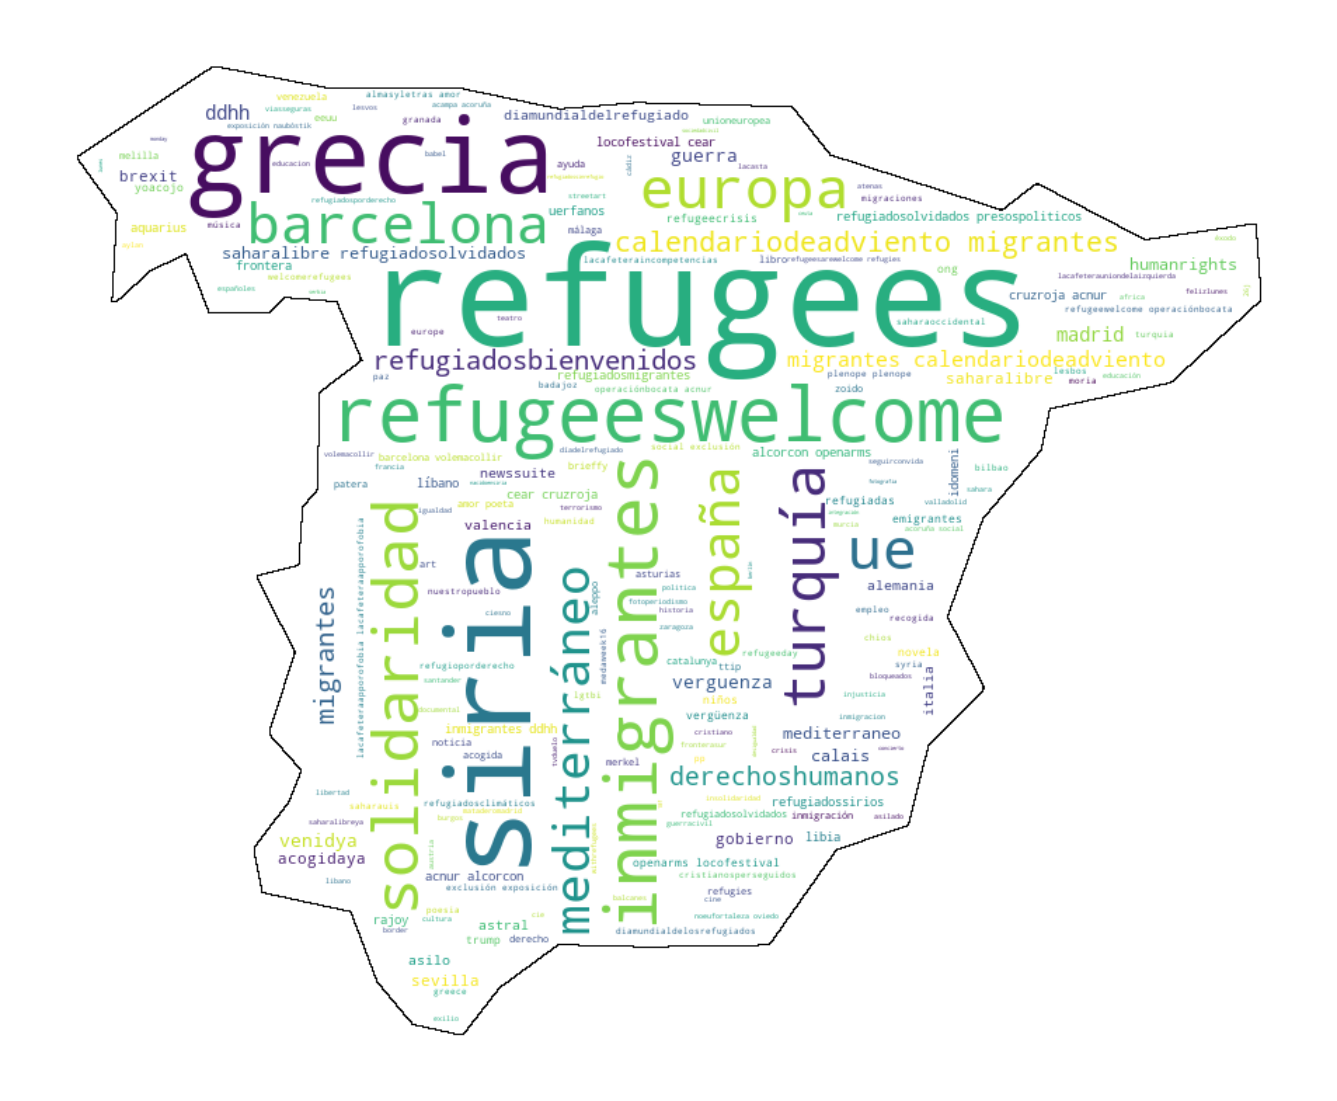

In [14]:
#show wordcloud


plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [82]:
wordcloud = wordcloud.to_file('de_seebrücke.png')

In [59]:
df['post_body']

0         L’esercito silenzioso delle #donne #migranti h...
1         .@lauraravetto: #Migranti, “Che dice Minniti s...
2                    #refugeecrisis https://t.co/JQoSFvMTbl
3         .@lauraravetto : #Migranti, “Che dice Minniti ...
4         ".@theresa_may: '"We can still have EU workers...
                                ...                        
168248    ". @JunckerEU  '"We want to get rid of this id...
168249    Malts should not be allowed to deal with #migr...
168250    #RussianDissident Artist Will Seek #Asylum in ...
168251    Just caught this sight out of my bedroom windo...
168252    "Innovators thrive '"when cultures collide and...
Name: post_body, Length: 168253, dtype: object